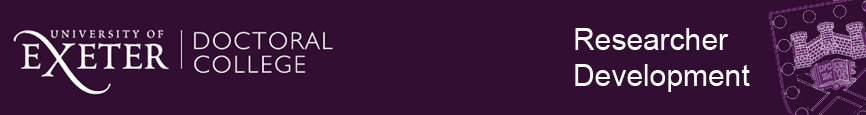

In [1]:
# Ignore this code; it's only here to display the image below
%matplotlib inline
from IPython.display import Image
Image("../images/logo.jpg")

# Python for scientific research
# Number crunching using `NumPy/SciPy`

### John Joseph Valletta
### University of Exeter, Penryn Campus, UK
### June 2017

# Introduction
* **Numpy** (numeric Python) package provides a compehensive set of mathematical data structures (e.g vector, matrix) and functions (e.g trigonometry, random number generator)
* **SciPy** (scientific python) library builds on top of Numpy to provide a collection of numerical algorithms for:
    + Statistics (e.g correlation coefficient)
    + Signal processing (e.g Fourier transform, filtering)
    + Solving differential equations
    + Optimisation
    + and much more
    
We will get a taste of Numpy/Scipy by performing some basic operations

# Numpy
Let us start by creating arrays which are `Numpy`'s main data structure. Arrays are essentially the same as lists but with one key difference, *every* element of an array is of the *same* type, for example, integer or float. We cannot mix strings and integers. This limitation allows us to create very efficient data structures which take up far less memory than a list. 

In [2]:
import numpy as np

# 1D array/vector
x = np.array([1, 2, 3, 4])

In [3]:
type(x) # the type of our variable x

numpy.ndarray

In [4]:
x.dtype # the type of the *elements* of x

dtype('int64')

In [5]:
# 2D array
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [6]:
x.shape # return dimensions of matrix

(3, 3)

In [7]:
x*x # element-by-element multiplication

array([[ 1,  4,  9],
       [16, 25, 36],
       [49, 64, 81]])

In [8]:
np.dot(x, x) # matrix multiplication

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [9]:
np.mat(x)*np.mat(x) # matrix multiplication (cast 2D numpy array as an object of type matrix)

matrix([[ 30,  36,  42],
        [ 66,  81,  96],
        [102, 126, 150]])

In [10]:
type(x)

numpy.ndarray

In [11]:
type(np.mat(x))

numpy.matrixlib.defmatrix.matrix

In [12]:
# Generate random numbers
np.random.rand() # from a uniform distribution 

0.6302146071940589

In [13]:
np.random.randn() # from a normal distribution

-2.1663209315574354

We can slice arrays and matrices in a similar way we sliced strings and lists

In [14]:
x = np.random.randn(2, 4) # create a 2 x 4 array of random numbers
print(x)

[[-0.83738296  0.87313289  2.71674803 -0.73033481]
 [-0.57737879 -1.26920495 -1.12461493  0.01924878]]


In [15]:
x[0, 0] # access first row first column

-0.83738296100565301

In [16]:
x[-1, -1] # access last row las column

0.019248775378290374

In [17]:
x[0, :] # access all the columns of the first row

array([-0.83738296,  0.87313289,  2.71674803, -0.73033481])

In [18]:
x[:, -1] # access all the rows of the last column

array([-0.73033481,  0.01924878])

# Exercise 1
1. Create a 2D matrix as shown above. Use the appropriate method to compute the min, max and sum of a matrix, first across columns and then across rows
2. Repeat the above but create the 2D matrix using random numbers generated from a uniform distribution and then from a normal distribution

**Hint**: Use the `axis` argument to specify whether you want to perform the operation column or row wise. For example `x.sum(axis=0)` will sum column wise, while `x.sum(axis=1)` sill sum row wise

# Scipy
Let us create some random arrays and compute popular statistical tests on them.

In [19]:
import scipy.stats as sp

# Create two random arrays with 100 values
x1 = np.random.randn(100) 
x2 = np.random.randn(100)

# Correlation coefficientss
sp.pearsonr(x1, x2) # pearson correlation and p-value

(0.20001962033277104, 0.046014505071164766)

In [20]:
sp.mannwhitneyu(x1, x2) # Mann-Whitney rank test

MannwhitneyuResult(statistic=3935.0, pvalue=0.0046477924499814379)

In [21]:
sp.ttest_ind(x1, x2) # t-test

Ttest_indResult(statistic=2.4758606631178299, pvalue=0.014130822489291615)

In [22]:
x2 = 3*x1 + np.random.randn(100) # induce some relationship between x1 and x2
sp.linregress(x1, x2) # least squares regression

LinregressResult(slope=3.157248181970675, intercept=-0.071431407712371331, rvalue=0.93845706051114719, pvalue=4.8674893928734474e-47, stderr=0.1173811846858193)

## Exercise 2
1. Create two random arrays and compute the spearman and kendall correlation coefficient
2. On the same random arrays perform a Mann-Whitney rank test and a Wilcoxon signed-rank test
3. Induce some relationship between `x1` and `x2` (e.g `x2 = 2*x1 + random() - 2`). Re-compute the stats in 1. and 2. and perform least squares regression 

# Predator prey equations (Lotka Volterra)
We will finish this practical by going through the predator prey equations introduced during the lecture. Your task is to reproduce this example in your own script. Change the model's parameters and initial conditions and observe what happens to the output. 

Let us first recall the Lotka Volterra equations:

\begin{align*}
 \frac{d{u}}{d{t}} &= \alpha u - \beta uv\\[1em]
\frac{d{v}}{d{t}} &= -\gamma v + \delta uv 
\end{align*}

Where:
* $u$: is the number of prey (e.g rabbits)
* $v$: is the number of predators (e.g foxes)
* $\alpha$: prey growth rate in the absence of predators
* $\beta$: dying rate of prey due to predation
* $\gamma$: dying rate of predators in the absence of prey
* $\delta$: predator growth rate when consuming prey

First we need to write a Python function that represents these equations

In [23]:
def predator_prey(x, t):
    """
    Predator prey model (Lotka Volterra)
    """
    # Constants
    alpha = 1
    beta = 0.1
    gamma = 1.5
    delta = 0.075
    
    # x = [u, v] describes prey and predator populations
    u, v = x
    
    # Define differential equation (u = x[0], v = x[1])
    du = alpha*u - beta*u*v
    dv = -gamma*v + delta*u*v
    
    return du, dv

Then we can call the ordinary differential equation (ODE) solver from `Scipy`

In [24]:
from scipy.integrate import odeint

time = np.linspace(0, 35, 1000) # time vector
init = [10, 5] # initial condition: 10 prey, 5 predators
x = odeint(predator_prey, init, time) # solve

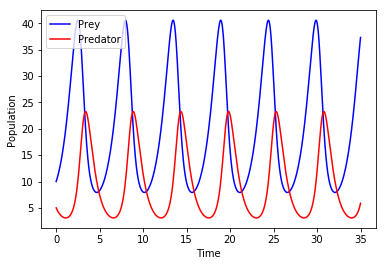

In [25]:
# We haven't introduced the plotting package yet, so don't worry about this bit, 
# it's only here to visualise the result
# We will introduce the plotting package in the next lecture
import matplotlib.pyplot as plt


plt.plot(time, x[:, 0], color="blue", label="Prey") # plot prey
plt.plot(time, x[:, 1], color="red", label="Predator") # plot predator
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend(loc="upper left")